In [71]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.stats import kde

In [60]:
calibration_data = pd.read_csv("R 2/PCA_CALIBRATION_2.csv")

X = calibration_data.iloc[:,4:405]
y = calibration_data.iloc[:,406]

#PCA 
pca_model = PCA(n_components= 13)
pca_model.fit(X)
X_pca = pca_model.transform(X)




In [62]:
spivey_data = pd.read_csv("/Users/sigurd/Documents/Perception and Action/Perception-Action-Exam/R 2/spivey_data_for_pca.csv")

X_spivey = spivey_data.iloc[:,4:405]
y_spivey = spivey_data.iloc[:,2]

X_spivey_pca = pca_model.transform(X_spivey)

In [70]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

lda.fit(X_pca, y)



lda.predict(X_spivey_pca)
lda.score(X_spivey_pca, y_spivey)

#get lda values. 
spivey_data["lda_value"] = lda.transform(X_spivey_pca)


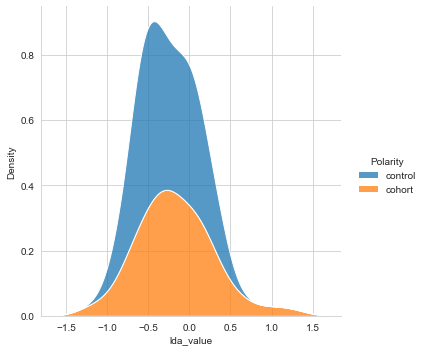

In [80]:
import seaborn as sns

sns.set_style('whitegrid')
sns.displot(spivey_data, x = "lda_value", hue = "Polarity", kind = "kde", multiple = "stack")

In [85]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

y_score_lda = lda.fit(X_pca, y).decision_function(X_spivey_pca)



In [89]:

fpr = dict()
tpr = dict()
roc_auc = dict()

n_classes = y_spivey[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_spivey[:, i], y_score_lda[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


TypeError: 'str' object cannot be interpreted as an integer